<a href="https://colab.research.google.com/github/SharmaAshwini/UNT/blob/main/Methods%20in%20Empirical%20Analysis/Exercise_8_Resampling_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ICE_8**: Resampling Techniques

**INSTRUCTIONS**
####Provide your observation/summary for all tutorials and tasks. Marks will be deducted for those who dont write the summary.
####Print this file as pdf and submit both pdf and .ipynb file(No screenshots). Not submitting any of these files will impact their grades.

##Tutorial

###Probability Example

Here we will review the difference between sampling with and without replacement. We will calculate the probability of an event using simulation.Consider a bowl filled with colored candies - three blue, two green, and five yellow. Draw three candies at random, with replacement and without replacement. You want to know the probability of drawing a yellow candy on the third draw given that the first candy was blue and the second candy was green.

In [ ]:
import numpy as np
np.random.seed(123)

# Set up the bowl
success_rep, success_no_rep, sims = 0, 0, 10000
bowl = ['b', 'b', 'b', 'g', 'g', 'y', 'y', 'y', 'y', 'y']

for i in range(sims):
    # Sample with and without replacement & increment success counters
    sample_rep = np.random.choice(bowl, size=3, replace=True)
    sample_no_rep = np.random.choice(bowl, size=3, replace=False)
    if (sample_rep[0] == 'b') & (sample_rep[1] == 'g') & (sample_rep[2] == 'y'):
        success_rep += 1
    if (sample_no_rep[0] == 'b') & (sample_no_rep[1] == 'g') & (sample_no_rep[2] == 'y'):
        success_no_rep += 1

# Calculate probabilities
prob_with_replacement = success_rep / sims
prob_without_replacement = success_no_rep / sims
print("Probability with replacement = {}, without replacement = {}".format(prob_with_replacement,
                                                                           prob_without_replacement))

Probability with replacement = 0.0266, without replacement = 0.0415


#Task 1:**(20%)**


####Question 1(a)

Calculate the probability using simulation. A box contains 10 white balls, 20 reds and 30 greens. Draw 5 balls with replacement. What is the probability that
a. 3 white or 2 red
b. All 5 are the same color

In [ ]:
# Write your code here

In [ ]:
balls = ['white_ball', 'red_ball', 'green_ball']
ball_counts = [10, 20, 30]
box = []

for ball_count in ball_counts:
  for i in range(ball_count):
    box.append(balls[ball_counts.index(ball_count)])

print(box)

['white_ball', 'white_ball', 'white_ball', 'white_ball', 'white_ball', 'white_ball', 'white_ball', 'white_ball', 'white_ball', 'white_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'red_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball', 'green_ball']


In [ ]:
from collections import Counter

print(Counter(box).keys()) # equals to list(set(words))
Counter(box).values() #

dict_keys(['white_ball', 'red_ball', 'green_ball'])


dict_values([10, 20, 30])

In [ ]:
import numpy as np
np.random.seed(123)

# Set up the bowl
success_rep_3w2r, success_rep_5same, sims = 0, 0, 10000

success_rep_prob1 = 0
success_rep_prob2 = 0

for i in range(sims):
    # Sample with and without replacement & increment success counters
    success_rep_3w2r = np.random.choice(box, size=5, replace=True)
    dict1 = Counter(success_rep_3w2r)

    success_rep_5same = np.random.choice(box, size=5, replace=True)
    dict2 = Counter(success_rep_5same)

    if (dict1['white_ball'] == 3 & dict1['red_ball'] == 2):
        success_rep_prob1 += 1
    if (dict2['white_ball'] == 5 or dict2['red_ball'] == 5 or dict2['green_ball'] == 5):
        success_rep_prob2 += 1

# Calculate probabilities
prob_case1 = success_rep_prob1 / sims
prob_case2 = success_rep_prob2 / sims

print("Probability of 3 white or 2 red = {}, Probability all 5 are the same color = {}".format(prob_case1, prob_case2))

Probability of 3 white or 2 red = 0.047, Probability all 5 are the same color = 0.0355


####Question 1(b):

Two unbiased dice are thrown once and the total score is observed. Use a simulation to find the estimated probability that the total score is even or greater than 7.

In [ ]:
#Write your code here

In [ ]:
import numpy as np
np.random.seed(20)

# Set up the bowl
success_gt_7_even, sims = 0, 10000


for i in range(sims):

    dice_1 = np.random.randint(1, 6)
    dice_2 = np.random.randint(1, 6)

    sum_dice = dice_1 + dice_2

    if sum_dice > 7 or sum_dice % 2 == 0:
        success_gt_7_even += 1

# Calculate probabilities
prob_case_gt_even = success_gt_7_even / sims
print("Estimated probability of the total score is even or greater than 7: {}".format(prob_case_gt_even))


Estimated probability of the total score is even or greater than 7: 0.5958


**Observations:**

In this tutorial of resampling, we simulated how to calculate probabilities of an event from a population. In example, we learnt the difference between sampling with and without replacement. Here, the probability of that event was higher without replacement as the population was shrinking after the test.

There are 2 questions followed by this tutorial, in the first question we calculated probabilities of 2 different events using replacement technique learnt. In the second question, simulated the dice problem while considering even and sum of values from 2 dice.


##Tutorial

###BootStrapping

In [ ]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

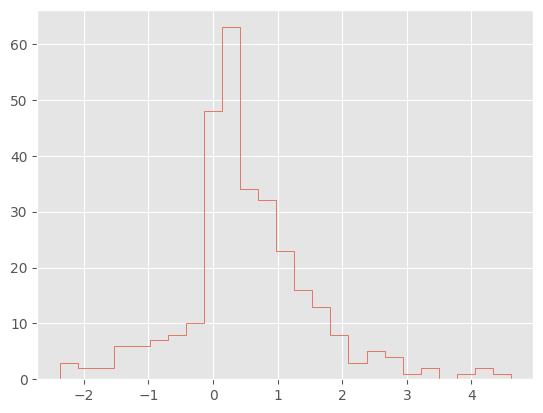

In [ ]:
# For example, what is the 95% confidence interval for
# the mean of this data set if you didn't know how it was generated?

x = np.concatenate([np.random.exponential(size=200), np.random.normal(size=100)])
plt.hist(x, 25, histtype='step');

In [ ]:
n = len(x)
reps = 10000
xb = np.random.choice(x, (n, reps))
mb = xb.mean(axis=0)
mb.sort()

np.percentile(mb, [2.5, 97.5])

array([0.438 , 0.6737])

###Reprise of bootstrap example for Monte Carlo integration

In [ ]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

In [ ]:
# data sample for integration
n = 100
x = f(np.random.random(n))

In [ ]:
# bootstrap MC integration
reps = 1000
xb = np.random.choice(x, (n, reps), replace=True)
yb = 1/np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)

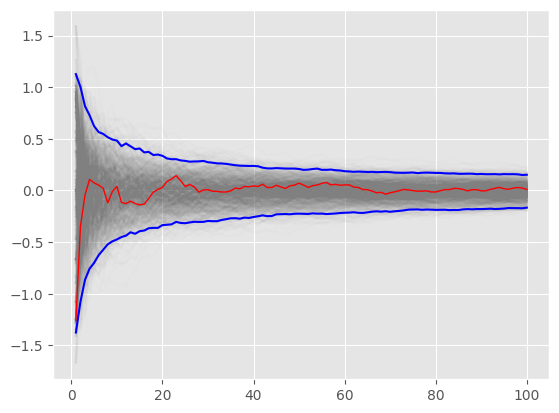

In [ ]:
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b');

###Write the observations of the above tutorial here.**(5%)**

**Observations**

Bootstrapping is one of the resampling techniques, which uses with Bootstrapping is one of the resampling techniques, which is used with replacement flow learnt in the last section to estimate the sampling distribution. It basically creates multiple random resamples from the dataset which increases the sample space, helping us to perform statistical measures by analyzing each resample and conclude better.

In this tutorial, first we create a dataset using a random number with exponential and normal distribution of some size (200 and 100). A histplot is also created to understand this generated dataset. Then we generate resamples of a certain size 10000 in this case, followed by a statistical measure like mean and finally find the 95% confidence interval for mean of the whole resampled dataset.

In the next section of reprise for Monte carlo integration, while generating the sample dataset using 100 random numbers, we estimate definite integrals using a function of sin and cos (mentioned in tutorial). While resampling from this dataset, we are not only generating new samples, but also using cumulative sum from these resamples generated (xb to yb), arranging values from 1 to 100 (sample space=100) on x-axis and respective resampled values from the integral function on y-axis. upper and lower are the values used in plotting the 95% confidence interval.


###BootStrap Example

###Running a Simple BootStrap

Suppose you own a factory that produces wrenches. You want to be able to characterize the average length of the wrenches and ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a representative sample of 100 wrenches. Let's use bootstrapping to get the 95% confidence interval (CI) for the average lengths.

In [ ]:
wrench_lengths = np.array([ 8.9143694 , 10.99734545, 10.2829785 ,  8.49370529,  9.42139975,
       11.65143654,  7.57332076,  9.57108737, 11.26593626,  9.1332596 ,
        9.32111385,  9.90529103, 11.49138963,  9.361098  ,  9.55601804,
        9.56564872, 12.20593008, 12.18678609, 11.0040539 , 10.3861864 ,
       10.73736858, 11.49073203,  9.06416613, 11.17582904,  8.74611933,
        9.3622485 , 10.9071052 ,  8.5713193 ,  9.85993128,  9.1382451 ,
        9.74438063,  7.20141089,  8.2284669 ,  9.30012277, 10.92746243,
        9.82636432, 10.00284592, 10.68822271,  9.12046366, 10.28362732,
        9.19463348,  8.27233051,  9.60910021, 10.57380586, 10.33858905,
        9.98816951, 12.39236527, 10.41291216, 10.97873601, 12.23814334,
        8.70591468,  8.96121179, 11.74371223,  9.20193726, 10.02968323,
       11.06931597, 10.89070639, 11.75488618, 11.49564414, 11.06939267,
        9.22729129, 10.79486267, 10.31427199,  8.67373454, 11.41729905,
       10.80723653, 10.04549008,  9.76690794,  8.80169886, 10.19952407,
       10.46843912,  9.16884502, 11.16220405,  8.90279695,  7.87689965,
       11.03972709,  9.59663396,  9.87397041,  9.16248328,  8.39403724,
       11.25523737,  9.31113102, 11.66095249, 10.80730819,  9.68524185,
        8.9140976 ,  9.26753801,  8.78747687, 12.08711336, 10.16444123,
       11.15020554,  8.73264795, 10.18103513, 11.17786194,  9.66498924,
       11.03111446,  8.91543209,  8.63652846, 10.37940061,  9.62082357])

In [ ]:
np.random.seed(123)

# Draw some random sample with replacement and append mean to mean_lengths.
mean_lengths, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(wrench_lengths, replace=True, size=len(wrench_lengths))
    sample_mean = np.mean(temp_sample)
    mean_lengths.append(sample_mean)

# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_lengths)
boot_95_ci = np.percentile(mean_lengths, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

Bootstrapped Mean Length = 10.0270443060217, 95% CI = [ 9.8045 10.2577]


##Task 2:**(15%)**

Calculate the 95% bootstrapped confidence interval for the median value.
####data = [7, 9, 10, 10, 12, 14, 15, 16, 16, 17, 19, 20, 21, 21, 23]

In [ ]:
np.random.seed(123)


data = [7, 9, 10, 10, 12, 14, 15, 16, 16, 17, 19, 20, 21, 21, 23]

# Draw some random sample with replacement and append mean to mean_lengths.
median_value, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(data, replace=True, size=len(data))
    sample_median = np.median(temp_sample)
    median_value.append(sample_median)

# Calculate bootstrapped mean for median values and 95% confidence interval.
boot_mean = np.mean(median_value)
boot_95_ci = np.percentile(median_value, [2.5, 97.5])
print("Resampled using median value, now calculating statistical measure as mean for the resampled space")
print("Bootstrapped mean for median values of data = {}, 95% CI = {}\n".format(boot_mean, boot_95_ci))


# Calculate bootstrapped median for median values and 95% confidence interval.
boot_median = np.median(median_value)
boot_95_ci = np.percentile(median_value, [2.5, 97.5])
print("Resampled using median value, now calculating statistical measure as median for the resampled space")
print("Bootstrapped median for median values of data = {}, 95% CI = {}".format(boot_median, boot_95_ci))

Resampled using median value, now calculating statistical measure as mean for the resampled space
Bootstrapped mean for median values of data = 15.647, 95% CI = [11.95 20.  ]

Resampled using median value, now calculating statistical measure as median for the resampled space
Bootstrapped median for median values of data = 16.0, 95% CI = [11.95 20.  ]


###Tutorial

###Leave one out cross validation

###1. import all the required libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

###2. Create the data

In [ ]:
df = pd.DataFrame({'y': [6, 8, 12, 14, 14, 15, 17, 22, 24, 23],
                   'x1': [2, 5, 4, 3, 4, 6, 7, 5, 8, 9],
                   'x2': [14, 12, 12, 13, 7, 8, 7, 4, 6, 5]})

###3. Performing leave one out cross validation to evaluate the performance

In [ ]:
#define predictor and response variables
X = df[['x1', 'x2']]
y = df['y']

#define cross-validation method to use
cv = LeaveOneOut()

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))

3.1461548083469726

###4. Evaluating the models performance using root mean squared error(RMSE)

In [ ]:
#define predictor and response variables
X = df[['x1', 'x2']]
y = df['y']

#define cross-validation method to use
cv = LeaveOneOut()

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))


3.619456476385567

**Observations:**

Cross validation is another resampling technique, mostly used for assessment and hyperparameter tuning for any model. Leave one out cross validation is one of the techniques in CV (like k-fold CV), where we just leave one sample for cross validation. Here we are using the sklearn library for implementing this technique.
Created a dummy dataframe where using LinearRegression model with LeaveOneOut() as cross validation scheme. Used mean absolute error and root mean squared error for evaluation purpose.


##Task 3: **(20%)**
Create the data of your own. Perform leave one out cross validation (LOOCV) and calculate mean absolute Error and Root mean Squared Error. Also write your analysis in detail.

In [ ]:
sales_df = pd.DataFrame({'y': [5.5512, 4.2717, 1.168, 1.3583, 3.0814, 5.3392, -53.2856, 65.978, 28.5984, 6.4864, -23.716, 181.9818],
                   'x1': [16.448, 11.784, 9.344, 2.89, 9.94, 11.36, 61.96, 149.95, 127.104, 64.864, 32.34, 699.93],
                   'x2': [2, 3, 2, 1, 2, 2, 4, 5, 6, 4, 10, 7]})


#define predictor and response variables
X = sales_df[['x1', 'x2']]
y = sales_df['y']

#define cross-validation method to use
cv = LeaveOneOut()

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print(f'Mean absolute error: {mean(absolute(scores))}')


#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
print(f'Root mean squared error: {sqrt(mean(absolute(scores)))}')


Mean absolute error: 19.34049149333725
Root mean squared error: 33.42363394710746


###Tutorial

###JackKnife Estimate of Parameters

In [ ]:
def jackknife(x, func):
    """Jackknife estimate of the estimator func"""
    n = len(x)
    idx = np.arange(n)
    return sum(func(x[idx!=i]) for i in range(n))/float(n)

In [ ]:
# Jackknife estimate of standard deviation
np.random.seed(20)

x = np.random.normal(0, 2, 100)
jackknife(x, np.std)

2.144945269784631

In [ ]:
def jackknife_var(x, func):
    """Jackknife estiamte of the variance of the estimator func."""
    n = len(x)
    idx = np.arange(n)
    j_est = jackknife(x, func)
    return (n-1)/(n + 0.0) * sum((func(x[idx!=i]) - j_est)**2.0
                                    for i in range(n))

In [ ]:
# estimate of the variance of an estimator
jackknife_var(x, np.std)

0.021524979137744423

Observation:

Jackknife estimate follows a different approach for resampling. It uses leave one out method and excludes a particular observation while doing the statistical analysis like mean or variance on complete dataset.
In this tutorial we learn about estimator function and variance of estimator function.

In the first function, we left one variable and calculated standard deviation for rest observations followed by sum and division by number of observations (taking an average).

In the second function, we checked the variance on top of the first function.


##Example

####Jackknife confidence interval for the median

In this exercise, we will calculate the jackknife 95% CI for a non-standard estimator. Here, we will look at the median. Keep in mind that the variance of a jackknife estimator is n-1 times the variance of the individual jackknife sample estimates where n is the number of observations in the original sample. Here, you are now estimating the median length of the wrenches along with a 95% CI to ensure that the wrenches are within tolerance.**(Using the data of wrench_lengths provided in the bootstrap example)**

In [ ]:
np.random.seed(123)

# Leave one observation out to get the jackknife sample and store the median length
median_lengths = []
index = np.arange(n)
for i in range(n):
    jk_sample = wrench_lengths[index != i]
    median_lengths.append(np.median(jk_sample))

median_lengths = np.array(median_lengths)

# Calculate jackknife estimate and it's variance
jk_median_length = np.mean(median_lengths)
jk_var = (n-1)*np.var(median_lengths)

# Assuming normality, calculate lower and upper 95% confidence intervals
jk_lower_ci = jk_median_length - 1.96 * np.sqrt(jk_var)
jk_upper_ci = jk_median_length + 1.96 * np.sqrt(jk_var)
print("Jackknife 95% CI lower = {}, upper = {}".format(jk_lower_ci, jk_upper_ci))

Jackknife 95% CI lower = 9.138592415216381, upper = 10.754868124783625


##Task 4:**(20%)**
Basic Jackknife estimation - mean



Calculate jackknife estimate for the mean. You own a wrench factory and want to measure the average length of the wrenches to ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a representative sample of 100 wrenches. Let's use jackknife estimation to get the average lengths.**(Use the data of wrench lengths provided in the bootstrap example)**.

In [ ]:
np.random.seed(123)

# Leave one observation out to get the jackknife sample and store the median length
mean_lengths = []
index = np.arange(n)
for i in range(n):
    jk_sample = wrench_lengths[index != i]
    mean_lengths.append(np.mean(jk_sample))

mean_lengths = np.array(mean_lengths)

# Calculate jackknife estimate and it's variance
jk_mean_length = np.mean(mean_lengths)
jk_var = (n-1)*np.var(mean_lengths)

# Assuming normality, calculate lower and upper 95% confidence intervals
jk_lower_ci = jk_mean_length - 1.96 * np.sqrt(jk_var)
jk_upper_ci = jk_mean_length + 1.96 * np.sqrt(jk_var)
print("Jackknife 95% CI lower = {}, upper = {}".format(jk_lower_ci, jk_upper_ci))

Jackknife 95% CI lower = 9.804859903949128, upper = 10.24935824425087


###Task 5: **(20%)**

####Question 5(a):

Explain the work flow of resampling in detail. Also write the advantages and drawbacks of resampling.

####Question 5(b):
What are the types of resampling methods. Explain them.

**Answer 5(a):**

As mentioned in the earlier section, resampling workflow helps to perform statistical analysis over parameters when we have limited observations in the dataset. We create multiple resamples from the original dataset and then perform statistical methods for each sample from this population in order to summarize/predict.

In order to understand it better, we can divide the process in certain steps, where we start from data collection i.e. the original dataset. Followed by finalizing an appropriate method which is covered in different sections of this workbook like bootstrapping or cross-validation. Like in bootstrapping we create multiple resamples and add to the original population which increases the size of the dataset and then we can perform the statistical operations on each observation to conclude.

We can use different statistical methods like mean, median, standard deviation to summarize and also can use confidence intervals to develop a better understanding (covered in tutorial).

Finally, can use this population and understanding for enhancing the model performance and can use different evaluation techniques to measure improvements.


**Advantages:**
Resampling really comes handy when dealing with biased or unbalanced datasets, for example, a dataset with very few observations in a certain class. Which makes it harder for models to train in that class. A dataset to train models to predict fraudulent subscribers while having very few observations covering fraudulent patterns.

Cross validation techniques like k-fold or leave one out helps understand how a model is performing, also helpful for fine tuning model hyperparameters.

**Drawbacks:**
Some techniques like leave one out cross validation, are computationally intensive as it requires computing N fits, in case N (observations) are more which can make it expensive with growing observation space.

Cross validation might lead towards overfitting as well.

Choosing a right technique for a given dataset is equally important, for example resampling can help datasets with unbalanced classes, however leave one out can cause serious harms for training and predictions.


**Answer 5(b):**

We have covered a few of the resampling methods in this tutorial like Bootstrapping, Cross validation, and Jackknife estimates.

**Bootstrapping** generates resamples from the original datasets with replacement (initial section) and generates a bigger population to perform the statistical measures to analyze and summarize.

**Cross validation** like leave one out, helps in better training the model by assessing and validating during the training process. Model can assess performance on unseen data with the help of LOO and can improve by learning coefficients better. Also hyperparameters can be tuned with the help of this technique. For example, tuning L1 or L2 regularization strength.

**Jackknife** estimates the parameter importance by using LOO internally. It helps to understand importance of that observation against rest all data points.
